Saving datascience_salaries.csv to datascience_salaries.csv
Shape: (1171, 7)
   Unnamed: 0       job_title   job_type experience_level       location  \
0           0  Data scientist  Full Time           Senior  New York City   
1           2  Data scientist  Full Time           Senior         Boston   
2           3  Data scientist  Full Time           Senior         London   
3           4  Data scientist  Full Time           Senior         Boston   
4           5  Data scientist  Full Time           Senior  New York City   

  salary_currency  salary  
0             USD  149000  
1             USD  120000  
2             USD   68000  
3             USD  120000  
4             USD  149000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job

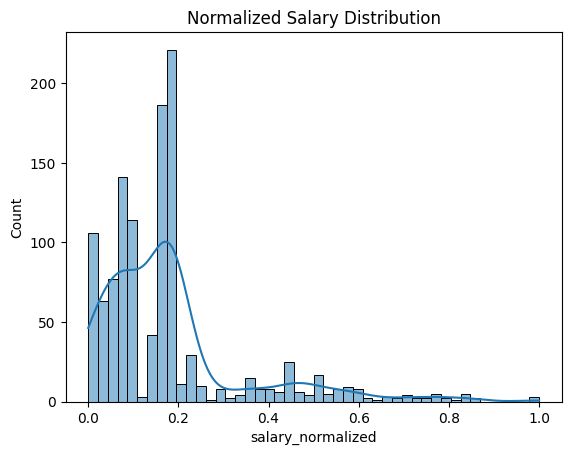

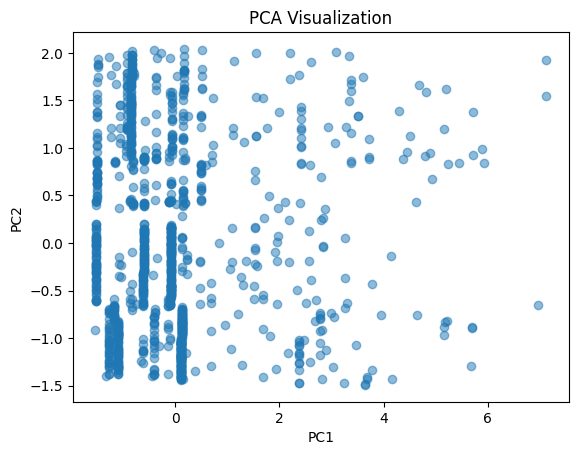

Explained variance ratio (PCA): [0.66674005 0.33325995]


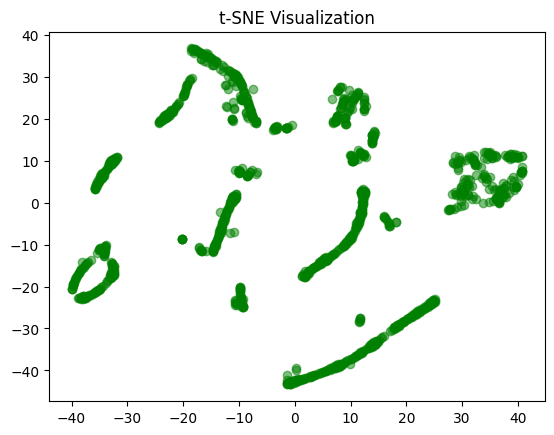

  experience_level          mean   median
0            Entry  36111.111111  30000.0
1        Executive  76076.923077  46000.0
2              Mid  51786.885246  51000.0
3           Senior  75088.033012  68000.0


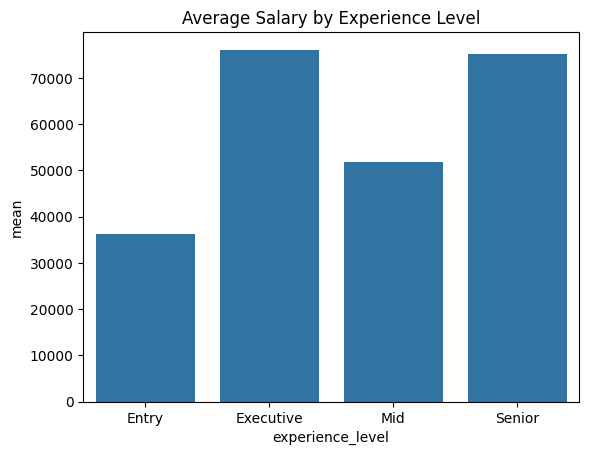

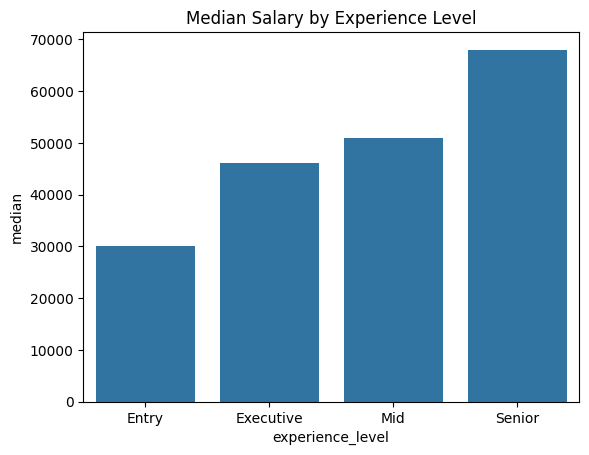

In [1]:
# Daily Challenge: Data Handling and Analysis in Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# 1. Upload and Load Dataset

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Shape:", df.shape)
print(df.head())
print(df.info())


# 2. Normalize Salary (Min-Max)

scaler = MinMaxScaler()
df["salary_normalized"] = scaler.fit_transform(df[["salary"]])

print(df[["salary", "salary_normalized"]].head())

sns.histplot(df["salary_normalized"], kde=True)
plt.title("Normalized Salary Distribution")
plt.show()


# 3. Dimensionality Reduction

# Keep only numeric features
num_cols = df.select_dtypes(include=np.number).columns
X = df[num_cols].dropna()

# Standardize before PCA
scaler_std = StandardScaler()
X_scaled = scaler_std.fit_transform(X)

# PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance ratio (PCA):", pca.explained_variance_ratio_)

# Optional: t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5, c="green")
plt.title("t-SNE Visualization")
plt.show()

# 4. Group by Experience Level

agg_salary = df.groupby("experience_level")["salary"].agg(["mean", "median"]).reset_index()
print(agg_salary)

sns.barplot(x="experience_level", y="mean", data=agg_salary)
plt.title("Average Salary by Experience Level")
plt.show()

sns.barplot(x="experience_level", y="median", data=agg_salary)
plt.title("Median Salary by Experience Level")
plt.show()
